**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt number of adjustment year](#toc3_1_)    
    - 3.1.1. [Effect on government](#toc3_1_1_)    
    - 3.1.2. [Effect on production firms](#toc3_1_2_)    
    - 3.1.3. [Effect on Phillips-curve](#toc3_1_3_)    
    - 3.1.4. [Effect on households](#toc3_1_4_)    
    - 3.1.5. [Effect on bequest and savings](#toc3_1_5_)    
    - 3.1.6. [Long term](#toc3_1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Government spending shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')

**Unpack namespaces:**

In [3]:
par = model.par
ss = model.ss
sol = model.sol

**Define sensitivity parameter and values:**

In [15]:
parameter = 'epsilon_B'                                               # set parameter 
parvalues = [0.05,0.15,0.5]                                          # set parameter values
models = model.multi_model(parameter,parvalues)                    # create one model for each value

Jacobian calculated in 15.6 secs
Jacobian calculated in 15.2 secs
Jacobian calculated in 14.8 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [16]:
Tshock = 50                                                    # length of shock
persistence = 0.5**np.arange(Tshock)                           # persistence of shock

In [17]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.00698 secs
it = 4
    max. abs. error = 2.77e-12
    7.27e-14 in A_R_ini_error
    3.55e-15 in Aq_diff
    2.33e-15 in FOC_capital_agency
    1.71e-12 in FOC_K_ell
    2.77e-12 in mkt_clearing
    1.66e-13 in PC

solve: t1-t0 = 0.05573 secs
evaluate + update: t3-t2 = 0.03061 secs
initial:
t1-t0 = 0.00677 secs
it = 4
    max. abs. error = 2.39e-12
    4.10e-14 in A_R_ini_error
    2.00e-15 in Aq_diff
    2.22e-15 in FOC_capital_agency
    5.84e-13 in FOC_K_ell
    2.39e-12 in mkt_clearing
    4.49e-14 in PC

solve: t1-t0 = 0.05333 secs
evaluate + update: t3-t2 = 0.03006 secs
initial:
t1-t0 = 0.00679 secs
it = 4
    max. abs. error = 2.83e-12
    6.25e-14 in A_R_ini_error
    1.78e-15 in Aq_diff
    2.11e-15 in FOC_capital_agency
    1.34e-12 in FOC_K_ell
    2.83e-12 in mkt_clearing
    4.67e-14 in PC

solve: t1-t0 = 0.10330 secs
evaluate + update: t3-t2 = 0.03018 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt number of adjustment year](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on government](#toc0_)

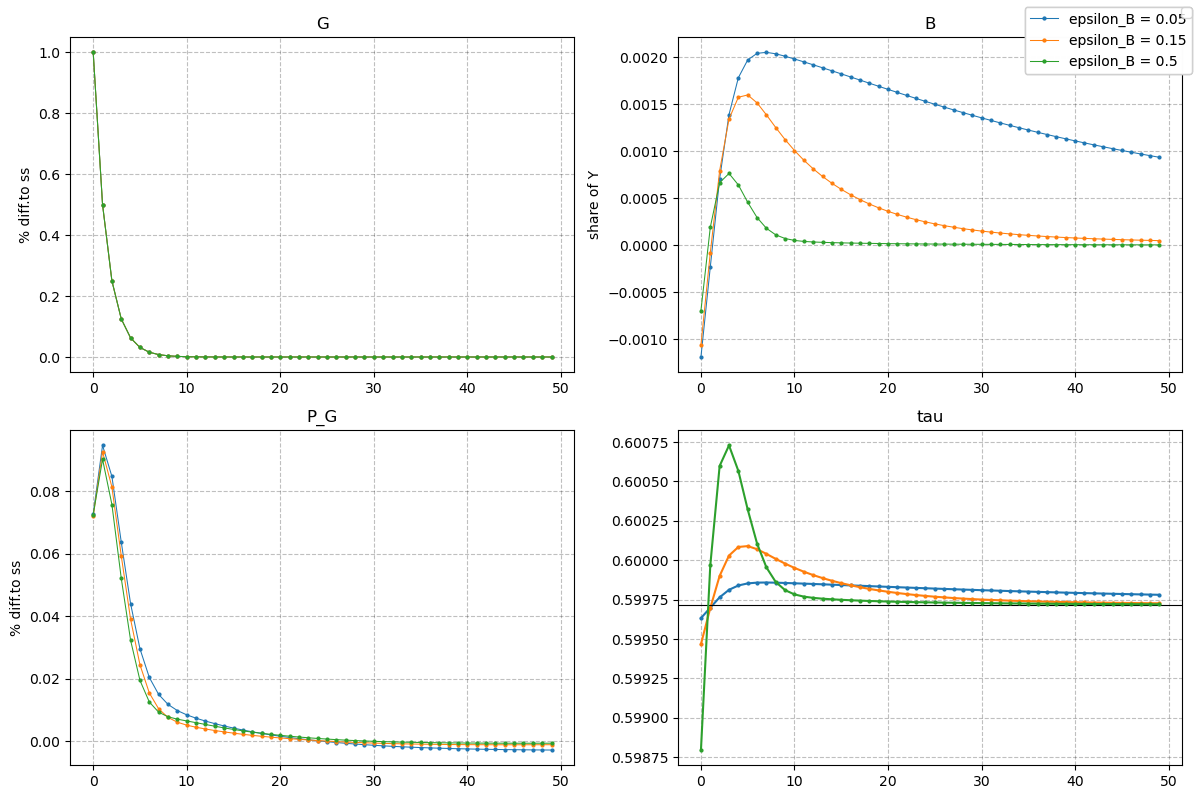

In [18]:
model.plot_IRF_models(models,parameter,varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'],ncol=2)

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on production firms](#toc0_)

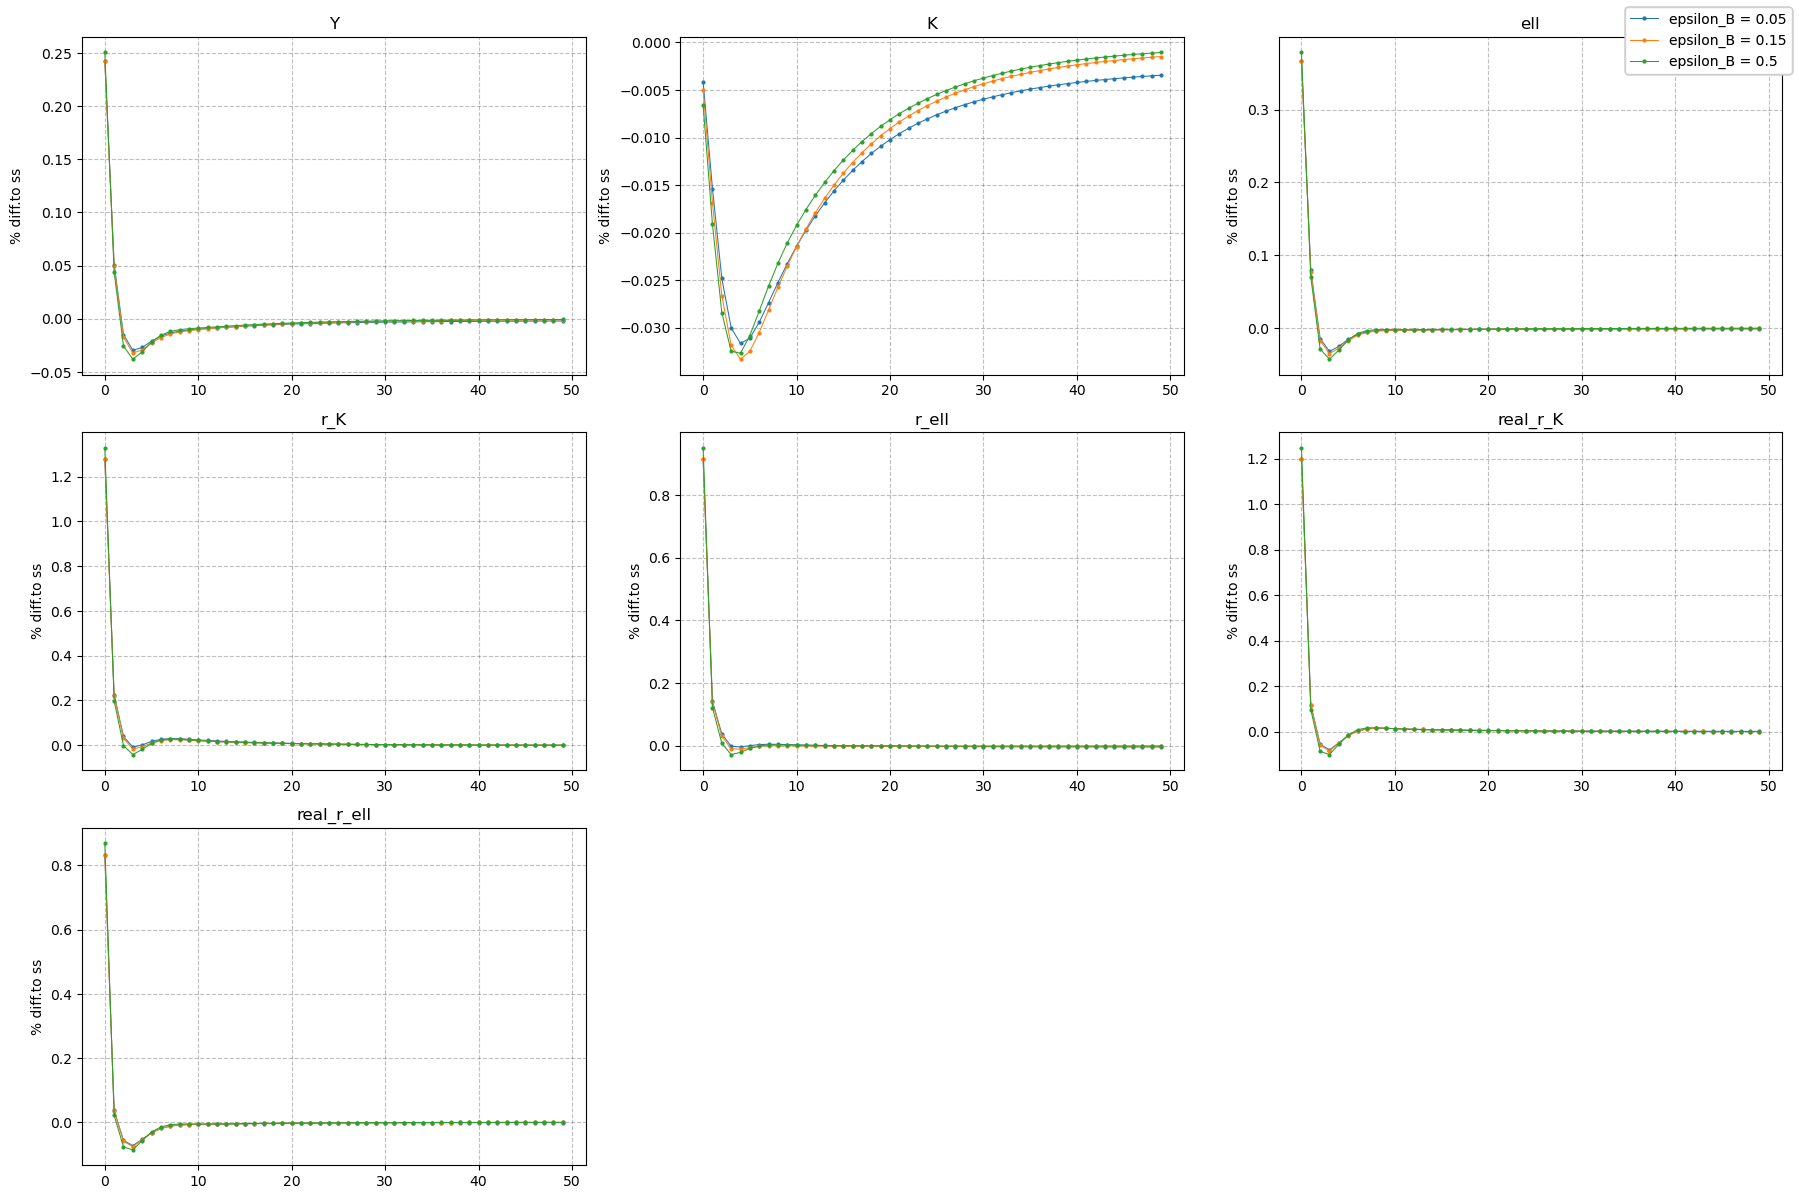

In [28]:
model.plot_IRF_models(models,parameter,varlist=['Y','K','ell','r_K','r_ell','real_r_K','real_r_ell'])

#### 3.1.3. <a id='toc3_1_3_'></a>[Effect on Phillips-curve](#toc0_)

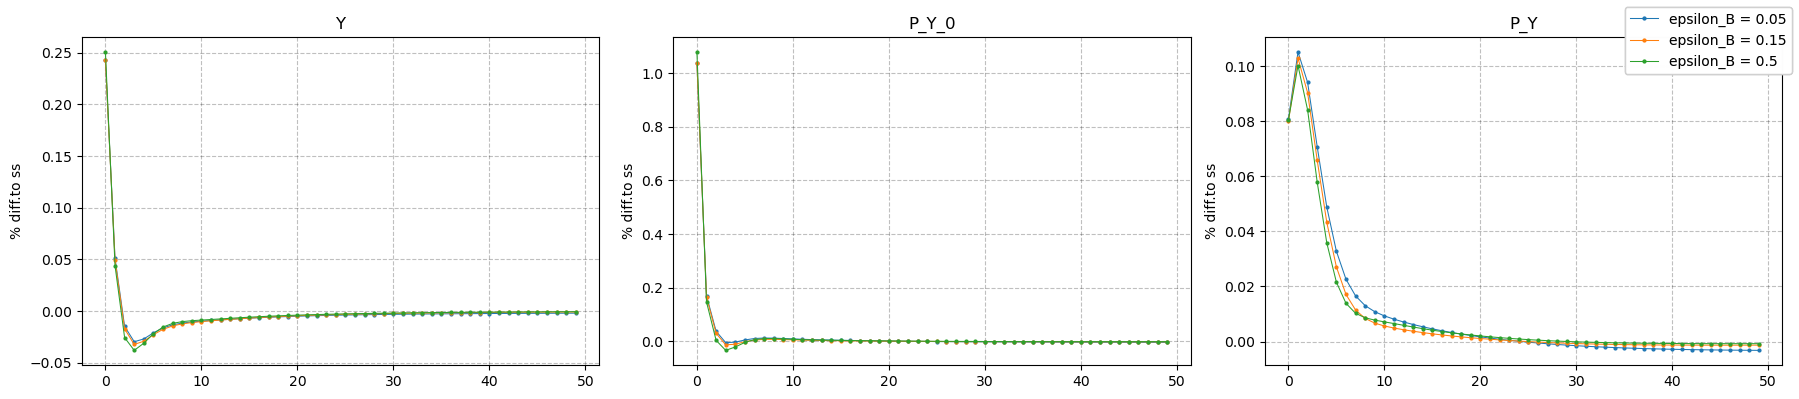

In [19]:
model.plot_IRF_models(models,parameter,varlist=['Y','P_Y_0','P_Y'])

#### 3.1.4. <a id='toc3_1_4_'></a>[Effect on households](#toc0_)

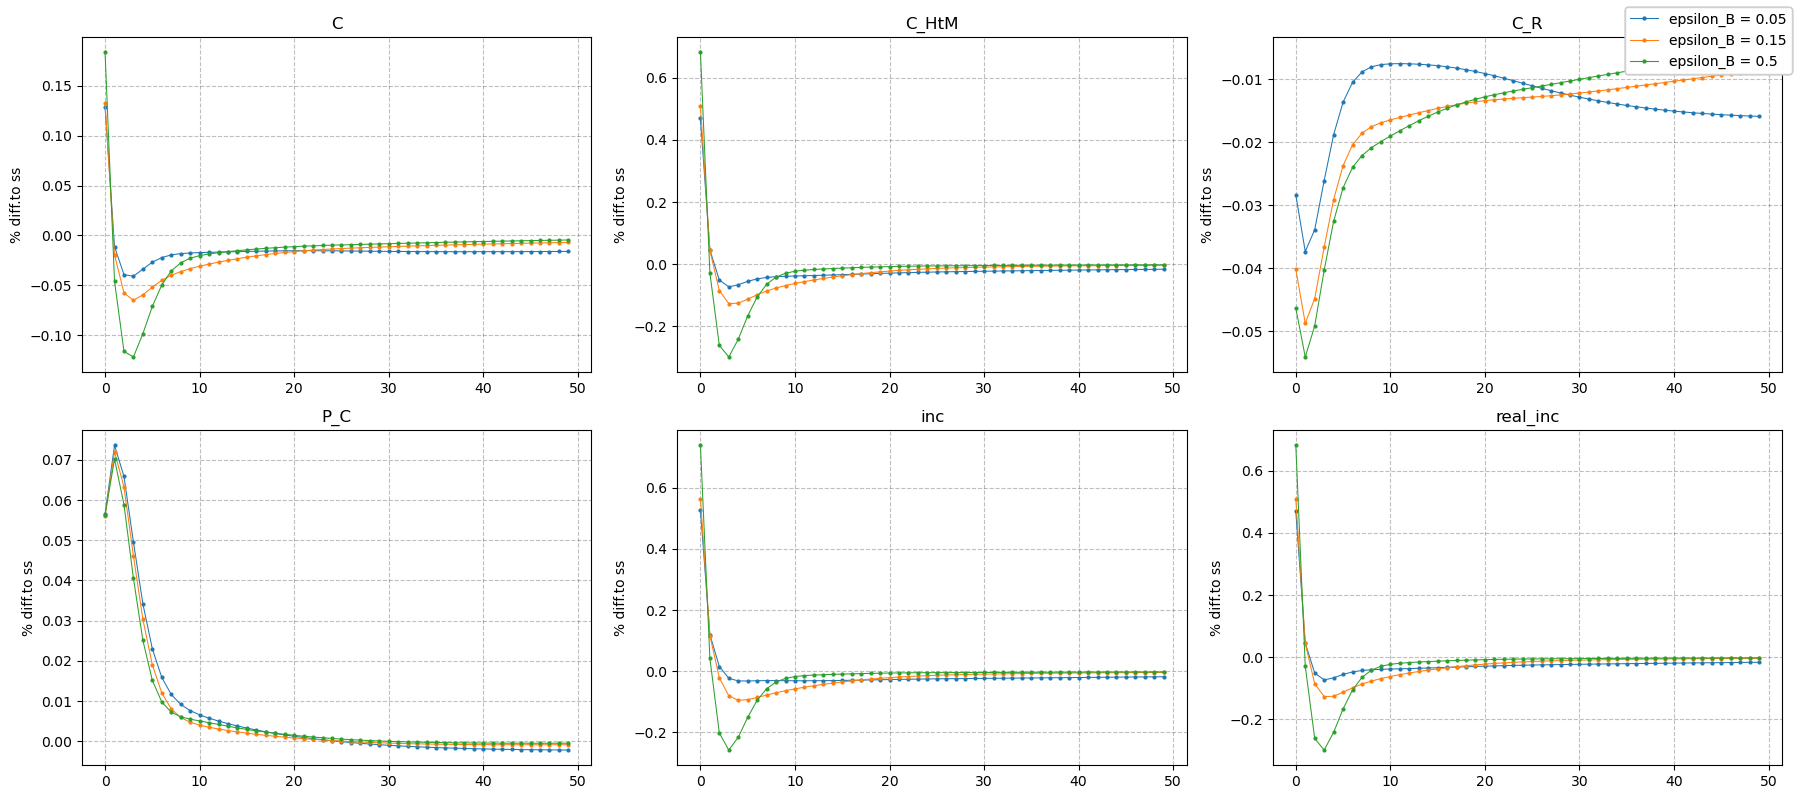

In [24]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'])

#### 3.1.5. <a id='toc3_1_5_'></a>[Effect on bequest and savings](#toc0_)

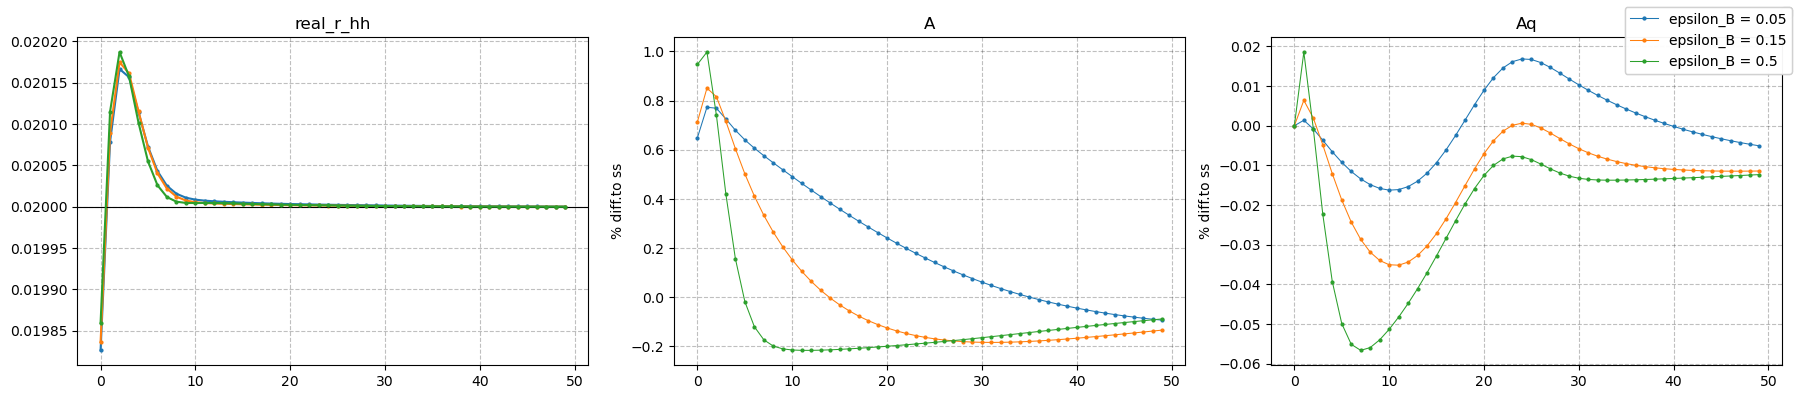

In [25]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])

#### 3.1.6. <a id='toc3_1_6_'></a>[Long term](#toc0_)

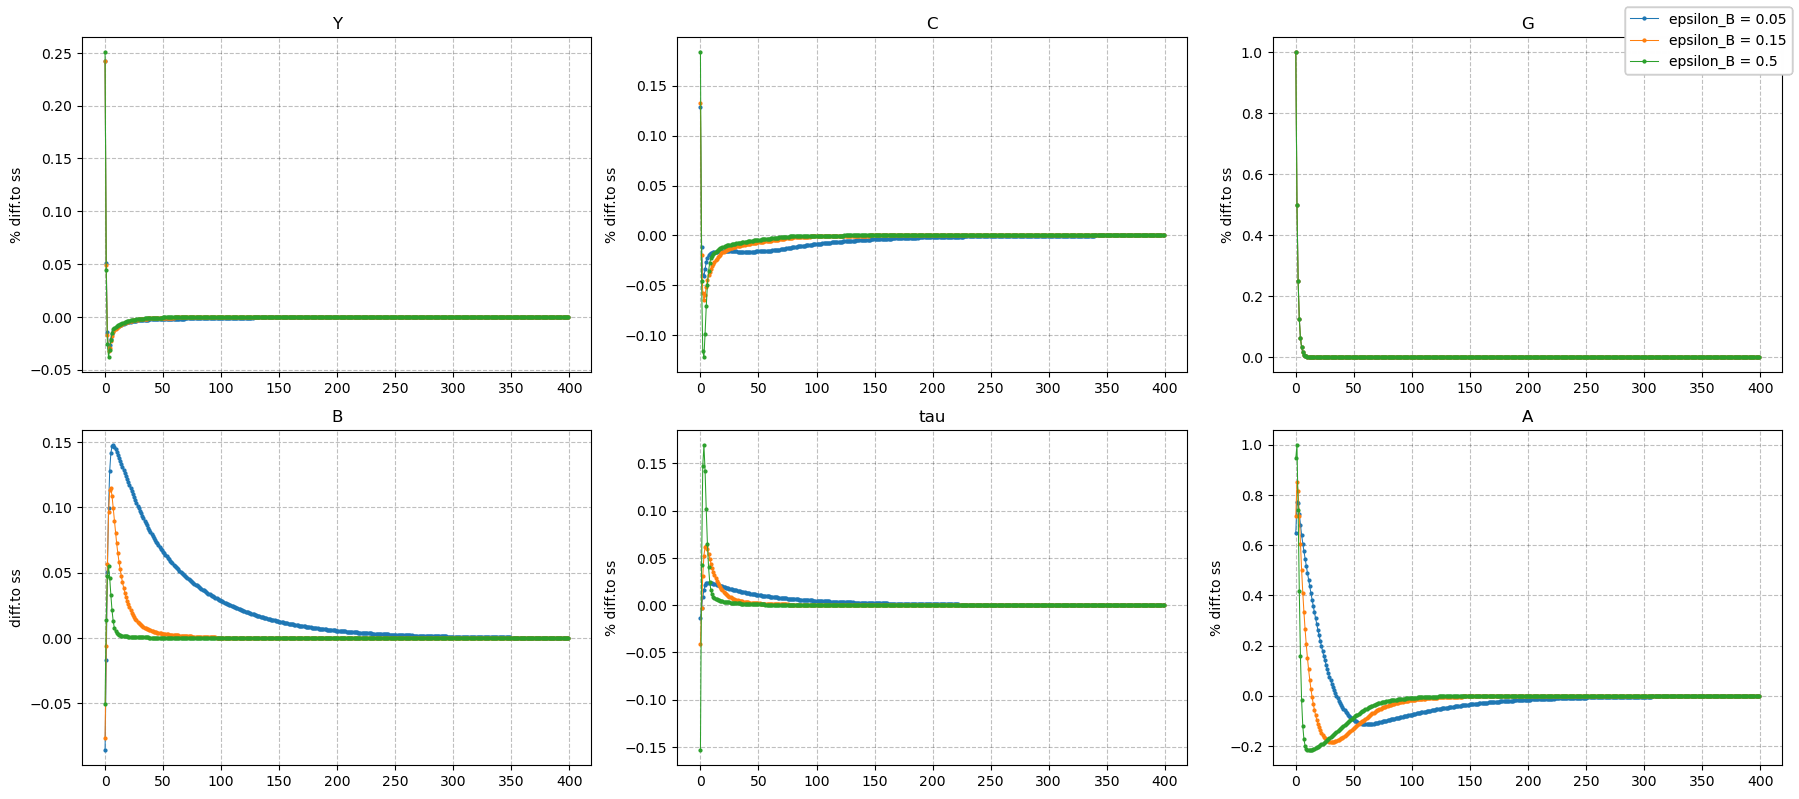

In [30]:
model.plot_IRF_models(models,parameter,varlist=['Y','C','G','B','tau','A'], T_IRF=par.T)